In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Train.csv')

In [5]:
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [6]:
df = df.values

In [7]:
df[:5, :]

array([[  0.29341624,  -0.94559871,  -0.42110515,   0.40681602,
          0.52566183, -82.15466656],
       [ -0.83608408,  -0.18922804,  -0.77640262,  -1.05383124,
          0.59799685, -48.89796018],
       [  0.23642511,   0.13283602,  -0.14772298,   0.69985396,
         -0.18736416,  77.2703707 ],
       [  0.17531181,   0.14319424,  -0.58111096,  -0.12210693,
         -1.29216807,  -2.98858081],
       [ -1.69301097,   0.54271187,  -2.79872942,  -0.68672304,
          1.24407683, -37.59672212]])

In [8]:
X = df[:, :5]
y = df[:, -1]

In [9]:
print(X.shape)
print(y.shape)

(1600, 5)
(1600,)


In [10]:
print(type(X))

<class 'numpy.ndarray'>


In [11]:
u = np.mean(X, axis = 0)
s = np.std(X, axis = 0)

In [12]:
X = (X-u)/s

In [14]:
ones = np.ones((X.shape[0], 1))
X = np.hstack((ones, X))
print(X[:5, :])

[[ 1.          0.29016495 -0.89871183 -0.37238147  0.44177059  0.52502448]
 [ 1.         -0.84270473 -0.15822922 -0.72365639 -0.99464217  0.59896038]
 [ 1.          0.23300381  0.15706968 -0.10209444  0.72994655 -0.20378187]
 [ 1.          0.17170821  0.16721032 -0.53057575 -0.07837668 -1.33303676]
 [ 1.         -1.70218787  0.55833582 -2.72308713 -0.63362489  1.25933909]]


In [15]:
print(u.shape)

(5,)


In [16]:
def hypothesis(X, theta):
    return np.dot(X, theta)

def error(X, y, theta):
    y_ = hypothesis(X, theta)
    e = 0.0
    m = X.shape[0]
    e =  np.sum((y_ - y)**2)
    return e/m

def gradient(X, y, theta):
    m = X.shape[0]
    y_ = hypothesis(X, theta)
    
    grad = np.dot(X.T, (y_ - y))
    return grad/m

def gradient_descent(X, y, learning_rate = 0.1, max_steps = 1000):
    n = X.shape[1]
    theta = np.zeros((n, ))
    error_list = []
    
    for i in range(max_steps):
        e = error(X, y, theta)
        error_list.append(e)
        
        grad = gradient(X, y, theta)
        theta = theta - learning_rate * grad
        
    return theta, error_list

In [17]:
theta, error_list = gradient_descent(X, y)

In [18]:
print(theta)

[ 0.31883538 29.59359198 94.65067706  8.37544469 45.52303635  2.46461552]


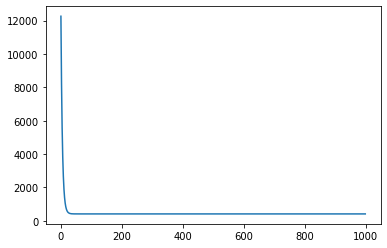

In [19]:
plt.plot(error_list)
plt.show()

In [20]:
def r2_score(y, y_):
    num = np.sum((y_ - y)**2)
    denom = np.sum((y - y.mean())**2)
    score = 1 - num/denom
    return score*100

In [21]:
y_ = hypothesis(X, theta)

In [22]:
r2_score(y, y_)

96.60939669975616

In [23]:
# prediction on testing data

In [24]:
X_test = pd.read_csv('Test.csv').values

In [28]:
ones = np.ones((X_test.shape[0], 1))
X_test = np.hstack((ones, X_test))
print(X_test)

[[ 1.00000000e+00  1.01525387e+00  2.07620944e+00 -2.66434820e-01
  -2.41808820e+00 -9.80502790e-01]
 [ 1.00000000e+00 -3.75021204e-01  9.53184528e-01  6.26719138e-01
   7.04405750e-01 -3.55489211e-01]
 [ 1.00000000e+00 -1.02445225e+00  9.62991107e-01 -4.07942004e-01
  -1.86127383e+00  4.55201351e-01]
 ...
 [ 1.00000000e+00  5.54727647e-01  1.76824345e+00 -8.97787210e-01
  -1.19366107e+00  3.40563374e-01]
 [ 1.00000000e+00 -1.62717246e+00  8.56470994e-01 -5.65729519e-04
   6.29386649e-01  4.53382144e-01]
 [ 1.00000000e+00  1.39310499e-01  5.31597186e-01 -8.53107053e-01
   3.16920076e-02  1.71489304e+00]]


In [29]:
y_test = hypothesis(X_test, theta)

In [30]:
print(y_test[:4])

[112.15168366 115.87976761 -25.87626158 -47.63583973]


In [31]:
print(y_test.shape)

(400,)


In [32]:
n = X_test.shape[0]
ids = np.arange(X_test.shape[0])
# ids = ids.reshape((n, 1))
# y_test = y_test.reshape((n, 1))
print(ids.shape, y_test.shape)

(400,) (400,)


In [33]:
ans = np.stack((ids, y_test))
ans = ans.T
print(ans.shape)
#df = pd.DataFrame(data = ans, columns = ['Id', 'target'])

(400, 2)


In [34]:
print(ans.shape)

(400, 2)


In [35]:
df = pd.DataFrame(data = ans, columns = ['Id', 'target'])

In [36]:
df.head()

,Id,target
0,0.0,112.151684
1,1.0,115.879768
2,2.0,-25.876262
3,3.0,-47.635840
4,4.0,-102.517982


In [37]:
df.to_csv('answer.csv', index = False)